In [1]:
import dicom # for reading dicom files
import os # for doing directory operations 
import pandas as pd
import numpy as np # linear algebra
import scipy.ndimage
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import measure, morphology

import utils

In [2]:
DATA_DIR = utils.get_data_dir()

patients = os.listdir(DATA_DIR + 'sample_images/')
labels_df = pd.read_csv(DATA_DIR + 'stage1_labels.csv')

labels_df.index = labels_df['id']

In [3]:
labeled_patients = list(set(patients) & set(labels_df["id"]))
labels_df

,id,cancer
id,,
0015ceb851d7251b8f399e39779d1e7d,0015ceb851d7251b8f399e39779d1e7d,1
0030a160d58723ff36d73f41b170ec21,0030a160d58723ff36d73f41b170ec21,0
003f41c78e6acfa92430a057ac0b306e,003f41c78e6acfa92430a057ac0b306e,0
006b96310a37b36cccb2ab48d10b49a3,006b96310a37b36cccb2ab48d10b49a3,1
008464bb8521d09a42985dd8add3d0d2,008464bb8521d09a42985dd8add3d0d2,1
0092c13f9e00a3717fdc940641f00015,0092c13f9e00a3717fdc940641f00015,0
00986bebc45e12038ef0ce3e9962b51a,00986bebc45e12038ef0ce3e9962b51a,0
00cba091fa4ad62cc3200a657aeb957e,00cba091fa4ad62cc3200a657aeb957e,0
00edff4f51a893d80dae2d42a7f45ad1,00edff4f51a893d80dae2d42a7f45ad1,1


In [4]:
labels_df = labels_df[labels_df['id'].isin(patients)]
print labels_df.shape

print(labeled_patients[0])

(19, 2)
0d19f1c627df49eb223771c28548350e


## Convert to HU


In [5]:
from preprocessing import get_slices, get_pixels_hu
cancer_patient = "245fe0c86269602b0dab44c345b0b412"
# what does the first slice look like
first_patient = get_slices(DATA_DIR + "stage1/" + cancer_patient)
# print(first_patient)
# what does the middle slice look like
first_patient_pixels = get_pixels_hu(first_patient)

In [6]:
# slices are first
first_patient_pixels.shape

(268, 512, 512)

In [7]:
from preprocessing import minIP
minIP_image3D = minIP(first_patient_pixels)

## minIP Demonstration
minIP transformation appears to improve filtering of arteries, etc.

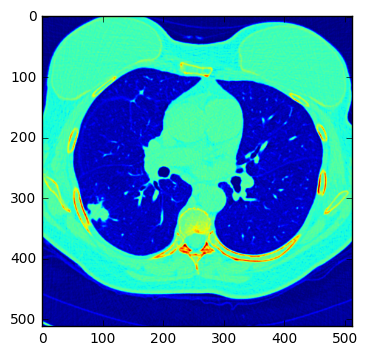

In [8]:
plt.imshow(first_patient_pixels[-123])

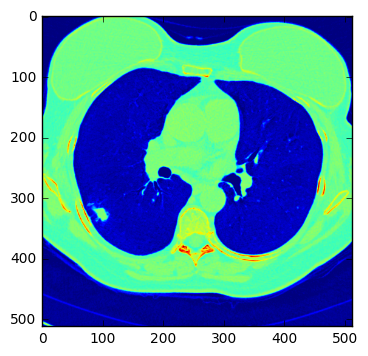

In [9]:
plt.imshow(minIP_image3D[-123])

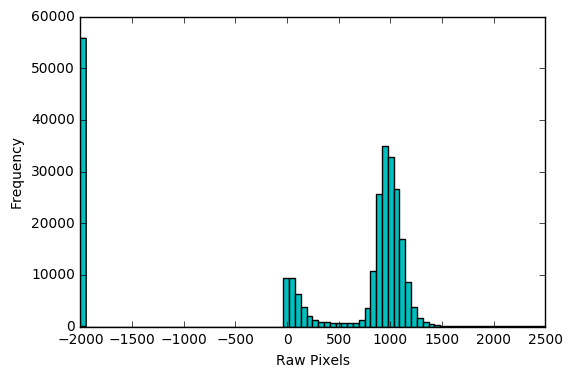

In [27]:
plt.hist(first_patient[0].pixel_array.flatten(), bins=80, color='c')
plt.xlabel("Raw Pixels")
plt.ylabel("Frequency")
plt.show()

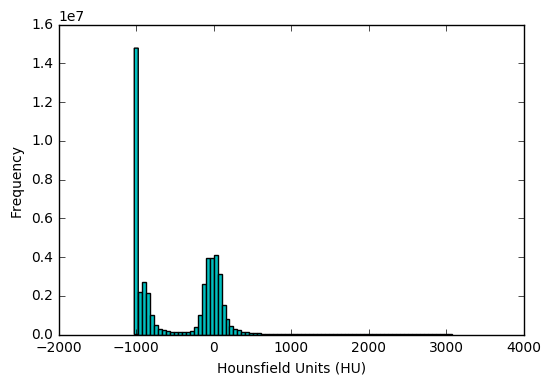

In [28]:
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

In [29]:
labeled_patients[0]

'0d19f1c627df49eb223771c28548350e'

## Dealing with spacing
A scan may have a pixel spacing of [2.5, 0.5, 0.5], which means that the distance between slices is 2.5 mm. For a different scan, this may be [1.5, 0.725, 0.725] which could be a problem for ConvNets.


A common method of dealing with this is resampling the full dataset to a certain isotropic resolution. If we choose to resample everything to 1mm, we can use 3D ConvNets without worrying about learning the slice-thickness invariance.

In [30]:
%%time
from preprocessing import resample

pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])
print spacing
print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resampling\t", pix_resampled.shape)

[ 1.          0.99999967  0.99999967]
('Shape before resampling\t', (183, 512, 512))
('Shape after resampling\t', (366, 370, 370))
CPU times: user 22.2 s, sys: 308 ms, total: 22.5 s
Wall time: 22.8 s


In [31]:
minIP_pix_resampled, spacing = resample(minIP_image3D, first_patient, [1,1,1])

## Plotting in 3D

In [33]:
from plotting import plot_3d 
plot_3d(pix_resampled, 400)

Exception KeyboardInterrupt in <function remove at 0x10c8aa320> ignored


KeyboardInterrupt: 

In [35]:
from plotting import plot_3d 
plot_3d(minIP_pix, 400)

NameError: name 'minIP_pix' is not defined

## Normalization and Zero Centering
The values of the pixels currently range from -1024 to 2000. Anything above 400 is not interesting to us since these are bones. A commonly used set of thresholds is to normalize between -1000 and 400. 

In [ ]:
# now in preprocessing

## Modeling
- verify correct matrix size for each of the 3D images

In [ ]:
def preprocess